### Verifying smearing on energy level (as opposed to histogram rebinning) does match

In [5]:
from numpy import *
from matplotlib.pyplot import *
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import fileread as fr
import predefined as pd
from scipy.signal import fftconvolve
from scipy.optimize import curve_fit
import pickle
import time

with open('detector_response.pickle','rb') as f:
    detector_response=pickle.load(f)

sn=load('../../zeck_simulation/snbpdip/113Sn.npy')
sn=pd.sim_restructure(sn)
sn=pd.sim_comb_single_pixel(sn)
sn=sn.view(recarray)

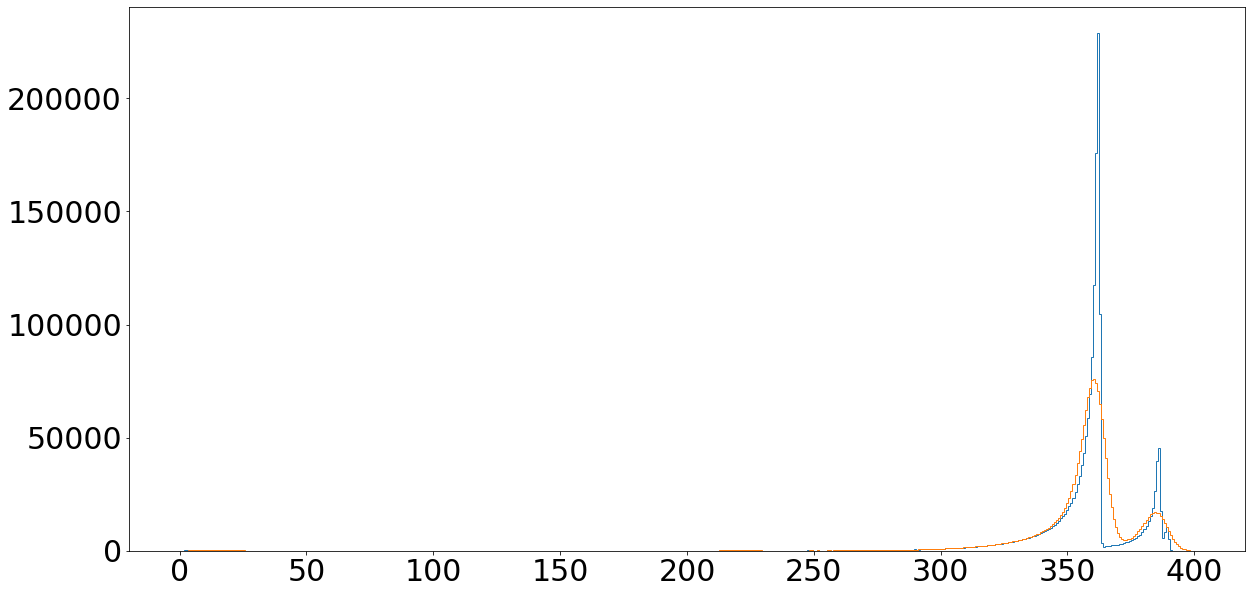

In [9]:
fs=30
bdch=11
bd,ch=int(bdch/8),int(bdch%8)
figure(figsize=(20,10))
trutharray=(sn.board==bd)*(sn.channel==ch)
sigma=detector_response[bdch]
smeared=sn.energy[trutharray] + np.random.normal(loc=0,scale=sigma,size=sum(trutharray))
hist(sn.energy[trutharray],bins=500,range=[0,400],histtype='step')
hist(smeared,bins=500,range=[0,400],histtype='step')
tick_params(labelsize=fs)
show()